# Titanic Survival Prediction and Mushroom Classification

This project involves two separate analyses: predicting the survival of passengers on the Titanic and classifying types of mushrooms based on various features. The analysis uses decision trees and random forest classifiers for model training and evaluation.

## Titanic Dataset Analysis

### Dataset Description

- **Source:** The dataset contains information about Titanic passengers, including features that might influence their survival.
- **Columns:**
  - `Survived`: Target variable (0 = No, 1 = Yes)
  - `Pclass`: Ticket class
  - `Sex`: Gender of the passenger
  - `Age`: Age of the passenger
  - `SibSp`: Number of siblings/spouses aboard
  - `Parch`: Number of parents/children aboard
  - `Fare`: Fare paid for the ticket
  - `Embarked`: Port of embarkation

### Preprocessing Steps

1. **Data Cleaning:**
   - Removed unnecessary columns: `Name`, `Ticket`, `PassengerId`, `Cabin`.
   - Filled missing `Age` values with the mean age and dropped remaining nulls.

2. **Label Encoding:**
   - Converted categorical variables: `Sex` and `Embarked` into numerical values.

3. **Feature Selection:**
   - Created feature matrix `x_data` and target vector `y_data`.

4. **Train-Test Split:**
   - Split the dataset into training (80%) and testing (20%) sets.

### Model Training

- **Decision Tree Classifier:**
  - Trained using entropy as the criterion.
  - Evaluated performance using a classification report.

- **Random Forest Classifier:**
  - Trained with default parameters and evaluated similarly.
  - Performed hyperparameter tuning using `GridSearchCV` to optimize model performance.

### Model Evaluation

- Displayed classification reports for both training and testing datasets.
- Visualized decision tree using Graphviz.

## Mushroom Dataset Analysis

### Dataset Description

- **Source:** The dataset contains information about various types of mushrooms, indicating whether they are edible or poisonous.
- **Columns:**
  - `class`: Target variable (edible = 0, poisonous = 1)
  - Various other features that describe the physical characteristics of the mushrooms.

### Preprocessing Steps

1. **Label Encoding:**
   - Encoded all categorical features using `LabelEncoder`.

2. **Feature Selection:**
   - Created feature matrix `x` and target vector `y`.

3. **Train-Test Split:**
   - Split the dataset into training (80%) and testing (20%) sets.

### Model Training

- **Random Forest Classifier:**
  - Trained on the mushroom dataset and evaluated using confusion matrix and classification report.

### Model Evaluation

- Displayed confusion matrix and classification report to assess model performance.

## Dependencies

- `numpy`
- `pandas`
- `matplotlib`
- `seaborn`
- `scikit-learn`
- `graphviz`

## Usage

1. Ensure all required libraries are installed.
2. Place the dataset files (`train.csv` for Titanic and `mushrooms.csv`) in the appropriate directory.
3. Run the notebook to perform data analysis, model training, and evaluation.

## Notes

- For the Titanic dataset, further analysis can be conducted by exploring additional features or trying different models.
- The mushroom dataset provides a binary classification problem that can also be approached using other algorithms for comparison.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# https://www.kaggle.com/competitions/titanic

In [ ]:
df = pd.read_csv("/content/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Remove Name Ticket PassengerId
processed_df = df.drop(["Name", "Ticket", "PassengerId", "Cabin"], axis=1, inplace=False)

mean_age = processed_df['Age'].mean()
processed_df['Age'].fillna(mean_age, inplace=True)
processed_df.dropna(inplace=True)
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
processed_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
label_mapping = {'S':0, 'C':1, 'Q':2, 'female': 0, 'male':1}
processed_df.replace(label_mapping, inplace=True)
processed_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,0
1,1,1,0,38.000000,1,0,71.2833,1
2,1,3,0,26.000000,0,0,7.9250,0
3,1,1,0,35.000000,1,0,53.1000,0
4,0,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0
887,1,1,0,19.000000,0,0,30.0000,0
888,0,3,0,29.699118,1,2,23.4500,0
889,1,1,1,26.000000,0,0,30.0000,1


In [ ]:
processed_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.255290,0.108669
Pclass,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193,0.043835
Sex,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958,-0.118593
Age,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604,0.009499
SibSp,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887,-0.060606
Parch,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532,-0.079320
Fare,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000,0.063462
Embarked,0.108669,0.043835,-0.118593,0.009499,-0.060606,-0.079320,0.063462,1.000000


In [ ]:
# Split the data -> .2
from sklearn.model_selection import train_test_split
x_data = processed_df.drop(['Survived'], axis=1)
y_data = processed_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((711, 7), (178, 7), (711,), (178,))

In [ ]:
#     Train     Test
# 1    .98        .75
# 2    .88        .87
# 3    .84        .72
# 4    .98        .76
# 5    .98        .88

# 2 is the best option (over fitting in number 5)

In [ ]:
# Use Decision tree to build a classifier for the data
# Print Train AND Test classification report


In [ ]:
# processed_df

# "Sex" "Embarked" -> Categorical Features

# One-hot encoding
#     Embarked -> ['S', 'C', 'Q']
#     Embarked_S Embarked_C Embarked_Q
#        1            0         0
#        0            1         0

#     Sex -> 'male', 'female'
#     Sex_male Sex_female
#     1         0
#     0         1


In [ ]:
# embarked_df = pd.get_dummies(processed_df['Embarked'])
# processed_df.drop('Embarked', axis=1, inplace=True)

In [ ]:
# processed_df = pd.concat([processed_df, embarked_df] , axis=1)
# """
# Replace "Sex" column with one-hot encoded values
# 1. One hot encode the column
# 2. drop from the column from the original dataframe
# 3. concat dataframe and one-hot encoded dataframe
# """
# sex_encoding_df = pd.get_dummies(processed_df["Sex"])
# processed_df.drop("Sex", axis=1, inplace=True)
# processed_df = pd.concat([processed_df, sex_encoding_df], axis=1)

In [ ]:
p_df = df.drop(["Name", "Ticket", "PassengerId", "Cabin"], axis=1, inplace=False)

# Labeling
#     Embarked -> ['S', 'C', 'Q'] -> [0 1 2]
label_mapping = {'S':0, 'C':1, 'Q':2, 'female': 0, 'male':1}
p_df.replace(label_mapping, inplace=True)
p_df['Age'].fillna(p_df.Age.mean(), inplace=True)
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [ ]:
p_df.dropna(inplace=True)

In [ ]:
from sklearn.metrics import classification_report
def EvalModel(model, x_train, y_train, x_test, y_test, train_report=True):
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)
    if train_report:
        print("Train: ", classification_report(y_train, y_pred_train))
    print("Test: ", classification_report(y_test, y_pred))

from sklearn.model_selection import train_test_split
x_data = p_df.drop(["Survived"], axis=1)
y_data = p_df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.2, random_state=2)
x_train.shape, x_test.shape

((711, 7), (178, 7))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=.1)
dt.fit(x_train, y_train)
EvalModel(dt, x_train, y_train, x_test, y_test, train_report=True)

Train:                precision    recall  f1-score   support

           0       0.83      0.89      0.86       438
           1       0.80      0.70      0.75       273

    accuracy                           0.82       711
   macro avg       0.81      0.80      0.80       711
weighted avg       0.82      0.82      0.81       711

Test:                precision    recall  f1-score   support

           0       0.86      0.86      0.86       111
           1       0.77      0.76      0.77        67

    accuracy                           0.83       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.83      0.83      0.83       178



In [ ]:
x_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

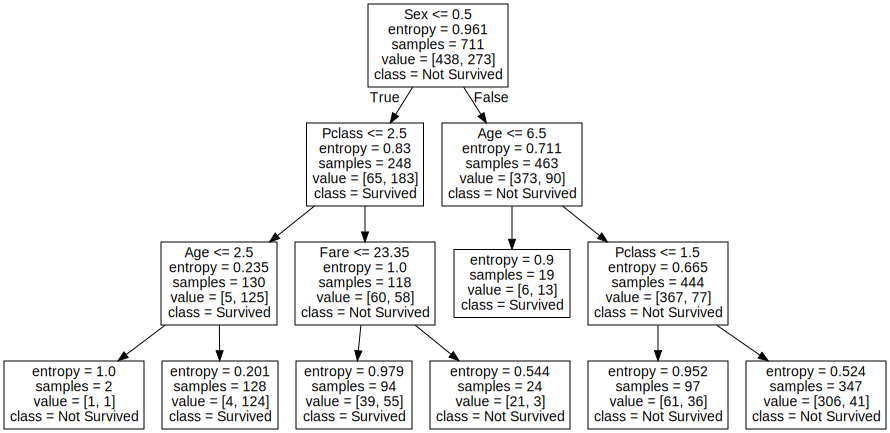

In [ ]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dt, feature_names=x_train.columns, class_names=['Not Survived', 'Survived'])
graph = graphviz.Source(dot_data)
graph
# Replace values in the column "Sex" with numeric labels

In [ ]:
p_df["Age"] = p_df['Age'].fillna(p_df["Age"].median())
p_df.dropna(inplace=True)
p_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 62.5 KB


In [ ]:
# Import RandomForestClassifier from Sklearn
from sklearn.ensemble import RandomForestClassifier

# Train it on the titanic dataset
rf = RandomForestClassifier(n_estimators=100 ,max_depth=3, criterion='entropy', min_samples_split=.2)
rf.fit(x_train, y_train)

EvalModel(rf, x_train, y_train, x_test, y_test)

# Look at tunable parameters

Train:                precision    recall  f1-score   support

           0       0.80      0.92      0.86       438
           1       0.84      0.63      0.72       273

    accuracy                           0.81       711
   macro avg       0.82      0.78      0.79       711
weighted avg       0.81      0.81      0.81       711

Test:                precision    recall  f1-score   support

           0       0.83      0.90      0.87       111
           1       0.81      0.70      0.75        67

    accuracy                           0.83       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.83      0.82       178



In [ ]:
from sklearn.model_selection import GridSearchCV, cross_validate

grid = {'max_depth':[3, 5, 10], 'criterion': ['log_loss', 'entropy', 'gini']}
rf1 = RandomForestClassifier()
gs = GridSearchCV(rf1, param_grid=grid)
gs.fit(x_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['log_loss', 'entropy', 'gini'],
                         'max_depth': [3, 5, 10]})

In [ ]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [ ]:
EvalModel(gs, x_train, y_train, x_test, y_test)


Train:                precision    recall  f1-score   support

           0       0.84      0.95      0.89       438
           1       0.90      0.71      0.79       273

    accuracy                           0.86       711
   macro avg       0.87      0.83      0.84       711
weighted avg       0.86      0.86      0.85       711

Test:                precision    recall  f1-score   support

           0       0.83      0.90      0.87       111
           1       0.81      0.70      0.75        67

    accuracy                           0.83       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.83      0.82       178



In [ ]:
import pandas as pd

df = pd.read_csv('/content/mushrooms.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:

from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])





In [ ]:
x = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
rfc.predict(x_test)

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, rfc.predict(x_test)))
print(classification_report(y_test, rfc.predict(x_test)))

[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

